In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

1. Session 1

In [2]:
dftrain = pd.read_csv('train.csv')
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#DESCRIPTIVE STATISTICS SALES PRICE VARIABLE

In [3]:
#describe data frame untuk mengetahui mean, median, nilai minimum, nilai maksimum, dst nya dari data
dftrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Dari data diatas dapat disimpulkan SalePrice paling rendah adalah 34.900, SalePrice rata-rata adalah 180.921, dan SalePrice paling tinggi adalah 755.000 

#SALE PRICE DISTRIBUTION

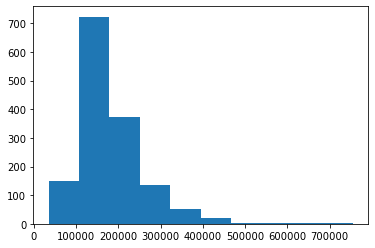

In [18]:
#melihat distribusi data

plt.hist(dftrain['SalePrice'])
plt.show()

Dari data histogram di atas kita mengetahui bahwa sale price termasuk dalam positive skewed

<function matplotlib.pyplot.show(*args, **kw)>

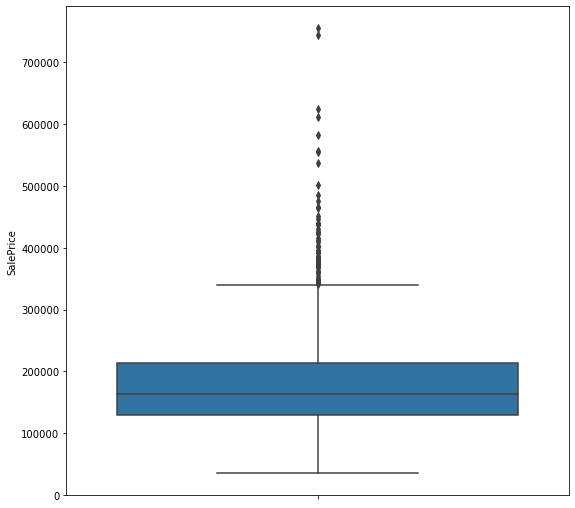

In [5]:
plt.figure(figsize = (9,9))
sns.boxplot(y='SalePrice', data = dftrain)
plt.show

Banyak outlier yang muncul pada boxplot diatas sehingga sebaiknya menggunakan median untuk analisa nya dimana outlier dapat mempengaruhi nilai mean sehingga nilai mean yang dihasilkan tidak representatif. Oleh karena itu median menjadi lebih robust dari outliers

2. Session 2

In [7]:
dftrain.shape

(1460, 81)

In [8]:
#sample

N = 1460
e = 0.02 
n = N/(1+N * e**2)
n

921.7171717171717

In [9]:
dfsample = dftrain.sample(n=922)
dfsample.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
465,466,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740
489,490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000
1308,1309,20,RM,100.0,12000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,147000
1090,1091,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,92900
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [10]:
dfsample['SalePrice'].head()

465     178740
489      86000
1308    147000
1090     92900
8       129900
Name: SalePrice, dtype: int64

In [11]:
year_2008 = dftrain[dftrain['YrSold'] == 2008]
year_2009 = dftrain[dftrain['YrSold'] == 2009]

In [12]:
year_2008.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [15]:
year_2008['SalePrice'].mean()

177360.83881578947

In [13]:
year_2009.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
25,26,20,RL,110.0,14230,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
36,37,20,RL,112.0,10859,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,145000


In [17]:
year_2009['SalePrice'].mean()

179432.10355029587

In [19]:
ttest = st.ttest_ind(a = year_2008['SalePrice'], b=year_2009['SalePrice'])
p_value = ttest.pvalue
print('p-value :',p_value)

if p_value >= 0.05:
    print('Harga rata-rata rumah pada tahun 2008 sama dengan harga rata-rata rumah pada tahun 2009')
else:
    print('Harga rata-rata rumah pada tahun 2008 tidak sama dengan harga rata-rata rumah pada tahun 2009')

p-value : 0.7297119988122991
Harga rata-rata rumah pada tahun 2008 sama dengan harga rata-rata rumah pada tahun 2009
